Scripts for the plots in:

# **Split minireporters facilitate monitoring of gene expression and peptide production in linear cell-free transcription-translation systems**


Antoine Lévrier (1,2,3), Julien Capin (1), Pauline Mayonove (1), Ioannis-Ilie Karpathakis (2), Peter Voyvodic (1), Angelique DeVisch (1), Ana Zuniga (1), Martin Cohen-Gonsaud (1), Stéphanie Cabantous (4), Vincent Noireaux (2), and Jerome Bonnet (1).

(1) Centre de Biologie Structurale (CBS), University of Montpellier, INSERM U1054, CNRS UMR5048, Montpellier, France

(2) School of Physics and Astronomy, University of Minnesota, Minneapolis, MN 55455, USA

(3) Université Paris Cité, INSERM U1284, Center for Research and Interdisciplinarity, F-75006 Paris, France

(4)Cancer Research Center of Toulouse (CRCT), Inserm, Université de Toulouse, UPS, CNRS, Toulouse, France.


* To whom correspondence should be addressed:
jerome.bonnet@inserm.fr


# Importing packages and data

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statistics
import os

In [ ]:
data = pd.ExcelFile ('Reorganised_data.xlsx')

#print(data.sheet_names)

df1 = data.parse('Fig2A')
df2 = data.parse('Fig2B')
df3 = data.parse('Fig2C')
df4 = data.parse('Fig3A')
df5 = data.parse('Fig3B')
df6 = data.parse('fig3C')
df7 = data.parse('Fig3D')
df8 = data.parse('Fig5B')
df9 = data.parse('FigS5A')
df10 = data.parse('FigS5B')

## Plotting method for Figure 2 and 3 ##

In [ ]:
def endpointfluo(dat, sheetname, style, condition, color, rotation, labels, column):
    data = pd.read_excel(dat, sheetname)
    time = 95

    if style==1:
        MEAN_pl, MEAN_l, STD_pl, STD_l, PL, L=[], [], [], [], [], []

        val = [data.at[time, k] for k in column]
        w = int(len(column)/style)

        for x in range (0, w, 3):
            pl = [val[x], val[x+1], val[x+2]]
            mean = statistics.mean(pl)
            std = statistics.pstdev(pl)
            STD_pl+=[std]
            MEAN_pl+=[mean]
            PL += [pl]

        x = np.arange(len(labels))  # the label locations
        width = 0.2  # the width of the bars

        length = int(w/3)
        X=[]
        for i in range(length):
            X.append([i-0.1, i, i+0.1])

        X = np.array(X)
        PL = np.array(PL)

        fig, ax = plt.subplots(figsize=(8, 6))
        rects2 = ax.bar(x, MEAN_pl, width, yerr= STD_pl, label= condition[0], color=color, alpha=0.8, capsize = 2, edgecolor='0')

        for i in range(len(labels)):
            ax.scatter(X[i], PL[i], color='red', zorder=2, marker ="o", s=60, alpha =1, facecolors='gold', edgecolors='0')


    if style==2:

        MEAN_pl, MEAN_l, STD_pl, STD_l, PL, L=[], [], [], [], [], []

        val = [data.at[time, k] for k in column]
        w = int(len(column)/style)

        for x in range (0, w, 3):
            pl = [val[x], val[x+1], val[x+2]]
            l = [val[w+x], val[w+x+1], val[w+x+2]]

            mean = statistics.mean(l)
            std = statistics.pstdev(l)
            MEAN_l+=[mean]
            STD_l+=[std]

            mean = statistics.mean(pl)
            std = statistics.pstdev(pl)
            STD_pl+=[std]
            MEAN_pl+=[mean]

            L += [l]
            PL += [pl]

        x = np.arange(len(labels))  # label locations
        width = 0.2  # width of the bars


        length = int(w/3)
        X=[]
        for i in range(length):
            X.append([i-0.1, i, i+0.1])

        X = np.array(X)
        L = np.array(L)
        PL = np.array(PL)

        fig, ax = plt.subplots(figsize=(8, 6))
        rects1 = ax.bar(x - width/2, MEAN_l, width, yerr = STD_l, label=condition[0], color= color, alpha=0.8, capsize = 3, edgecolor='0')
        rects2 = ax.bar(x + width/2, MEAN_pl, width, yerr= STD_pl, label=condition[1], color= 'gray', alpha=0.8, capsize = 3, edgecolor='0')

        for i in range(len(labels)):
            ax.scatter(X[i]+ width/2, PL[i], color='red', zorder=2, marker ="o", s=40, alpha =1, facecolors='darkslategray', edgecolors='0')
            ax.scatter(X[i]- width/2, L[i], color='red', zorder=2, marker ="o", s=40, alpha =1, facecolors='gold', edgecolors='0')


    if style==3:

        MEAN_pl, MEAN_l, STD_pl, STD_l, PL, L=[], [], [], [], [], []

        val = [data.at[time, k] for k in column]
        w = int(len(column)/2)

        for x in range (0, w, 3):
            pl = [val[x], val[x+1], val[x+2]]
            l = [val[w+x], val[w+x+1], val[w+x+2]]

            mean = statistics.mean(l)
            std = statistics.pstdev(l)
            MEAN_l+=[mean]
            STD_l+=[std]

            mean = statistics.mean(pl)
            std = statistics.pstdev(pl)
            STD_pl+=[std]
            MEAN_pl+=[mean]

            L += [l]
            PL += [pl]

        x = np.arange(len(labels))  #label locations
        width = 0.2  #width of the bars

        length = int(w/3)
        X=[]
        Y=[]
        for i in range(length):
            X.append([i-0.1, i, i+0.1])
            Y.append(i)

        Y= np.array(Y)
        X = np.array(X)
        L = np.array(L)
        PL = np.array(PL)

        fig, ax = plt.subplots(figsize=(10, 6))

        for i in range(len(labels)):
            ax.scatter(X[i]+ width/2, PL[i], color='red', zorder=2, marker ="o", s=40, alpha =1, facecolors='darkslategray', edgecolors='0')
            ax.scatter(X[i]- width/2, L[i], color='red', zorder=2, marker ="o", s=40, alpha =1, facecolors='gold', edgecolors='0')
            ax.scatter(x[i], vivo[i], color='red', zorder=3,  marker ="d", s=200, alpha =1, facecolors='orangered', edgecolors='0')


        rects1 = ax.bar(x - width/2, MEAN_l, width, yerr = STD_l, label=condition[0], color= color, alpha=0.7, capsize = 3, edgecolor='0')
        rects2 = ax.bar(x + width/2, MEAN_pl, width, yerr= STD_pl, label=condition[1], color= 'gray', alpha=0.7, capsize = 3, edgecolor='0')


#Add features to the plots
    if style==1 or style==2:
        color= sns.color_palette('colorblind')
        ax.set_ylabel('FITC equivalent (µM)', fontsize=20, fontweight = 'normal', labelpad=10)
        ax.tick_params(axis='y', labelsize=20)
        ax.set_xticks(x)
        ax.set_xticklabels(labels, fontweight = 'normal')
        plt.xticks(fontsize= 16, fontweight = 'normal', rotation = rotation)
        if style==2:
            ax.legend(fontsize= 20, frameon=False)

    if style==3:
        # Add some text for labels, title and custom x-axis tick labels, etc.
        ax.set_ylabel('Relative fluorescence to P7-RiboJ-BCD-GFP', fontsize=16, fontweight = 'normal')
        ax.tick_params(axis='y', labelsize=20)

        #ax.set_title('Toehold screening fluorescence', fontsize=12)
        ax.set_xticks(x)
        ax.set_xticklabels(labels, fontweight = 'normal')
        plt.xticks(fontsize= 16, fontweight = 'normal', rotation = rotation)
        ax.legend(fontsize= 15, frameon=False)

    #plt.savefig(figname, format='svg') #Save the figure

    plt.show()

# **Plot Figure 2:** Functionality of split-GFP systems in linear CFS.

*  All proteins were expressed from linear DNA at 5nM concentration for each fragment
* fluorescence intensity values were extracted at 8 hours.
* Experiments were performed in triplicates on three different days.
* Error bars: +/- SD.

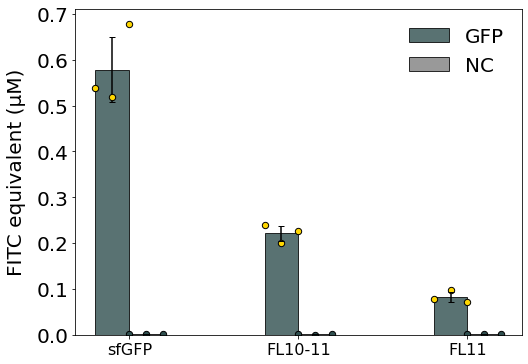

 Fig2A: Expression of sfGFP, FL10-11 and FL11 in TXTL. NC: negative control, no DNA.


In [ ]:
#Fig2A
#compare GFPs: sfGFP, reconstituted GFP1-10-11, reconstituted GFP1-9-10-11


figname = 'Fig2A: Expression of sfGFP, FL10-11 and FL11 in TXTL. NC: negative control, no DNA.'
A = df1.columns
L= A.to_list()
del L[0]

endpointfluo('Reorganised_data.xlsx', 'Fig2A', 2, ['GFP', 'NC'], 'darkslategray', 0,
     ['sfGFP', 'FL10-11', 'FL11',], L)

print(f" {figname}")

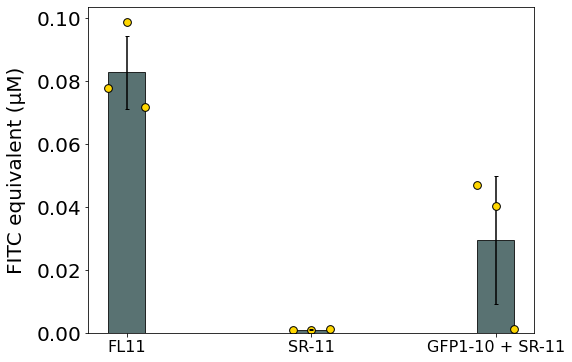

 Fig2B. Reassembly of SR-GFP11 with GFP1-10 in TXTL and comparison with FL11.


In [ ]:
#Fig2B
#compare basic GFP11 SR11: reconstituted GFP1-10-11, SR-11, GFP1-10 + SR-11

figname= 'Fig2B. Reassembly of SR-GFP11 with GFP1-10 in TXTL and comparison with FL11.'
A = df2.columns
L= A.to_list()
del L[0]
endpointfluo('Reorganised_data.xlsx', 'Fig2B', 1, [''], 'darkslategray', 0,
     ['FL11', 'SR-11', 'GFP1-10 + SR-11'], L)

print(f" {figname}")

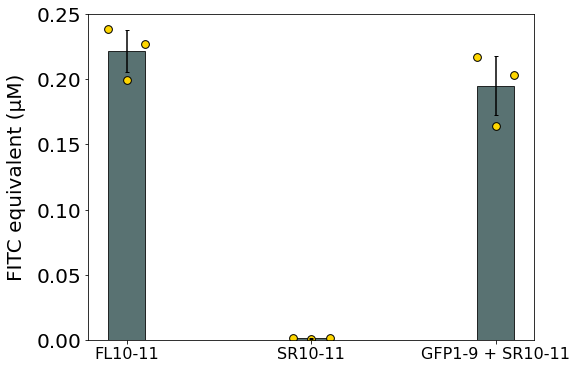

 Fig2C. Reassembly of SR-GFP10-11 with GFP1-9 in TXTL and comparison with FL10-11.


In [ ]:
#Fig2C
#compare basic GFP11 SR10-11: reconstituted GFP1-9-10-11, SR10-11, GFP1-9 + SR10-11

figname= 'Fig2C. Reassembly of SR-GFP10-11 with GFP1-9 in TXTL and comparison with FL10-11.'
A = df3.columns
L= A.to_list()
del L[0]
endpointfluo('Reorganised_data.xlsx', 'Fig2C', 1, [''], 'darkslategray', 0,
     ['FL10-11', 'SR10-11', 'GFP1-9 + SR10-11',], L)
print(f" {figname}")

# Figure 3: Optimization of minireporters-based on split-GFP and application to promoter library screening.


* linear DNA were added at a 5nM final concentration (exept for 3C also 10nM).
* Fluorescence intensity values were extracted at 8 hours.
* Experiments were performed in triplicates on three different days.
* Error bars: +/- SD.

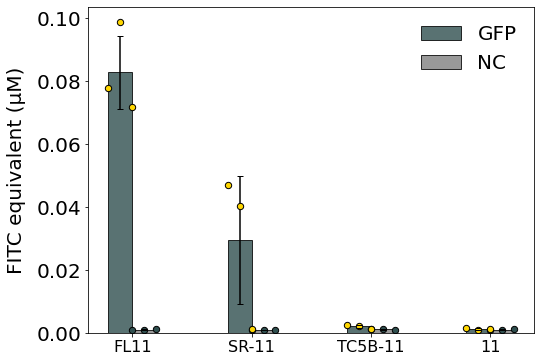

 Fig3A. Comparison of the fluorescence intensity produced by FL11 with the coexpression of GFP1-10 with GFP11 fused to SR, Tc5B or alone.


In [ ]:
#Fig3A
#GFP11 minireporter

figname= 'Fig3A. Comparison of the fluorescence intensity produced by FL11 with the coexpression of GFP1-10 with GFP11 fused to SR, Tc5B or alone.'

A = df4.columns
L= A.to_list()
del L[0]
endpointfluo('Reorganised_data.xlsx', 'Fig3A', 2, ['GFP', 'NC'], 'darkslategray', 0,
     ['FL11', 'SR-11','TC5B-11', '11'], L)
print(f" {figname}")

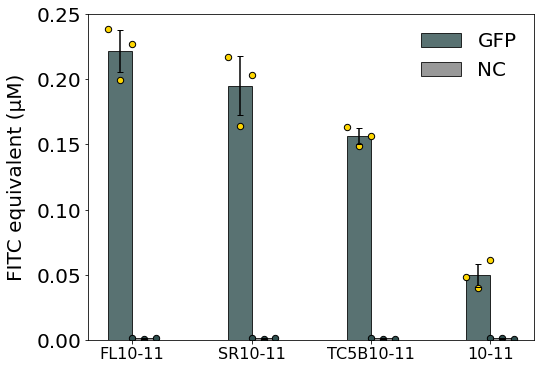

 Fig3B: Comparison of the fluorescence intensity produced by FL10 with the coexpression of GFP1-9 with GFP10-11 fused to SR, Tc5B or alone.


In [ ]:
#Fig3B
#GFP10_11 minireporter

figname= 'Fig3B: Comparison of the fluorescence intensity produced by FL10 with the coexpression of GFP1-9 with GFP10-11 fused to SR, Tc5B or alone.'
A = df5.columns
L= A.to_list()
del L[0]
endpointfluo('Reorganised_data.xlsx', 'Fig3B', 2, ['GFP', 'NC'], 'darkslategray', 0,
     ['FL10-11', 'SR10-11','TC5B10-11', '10-11'], L)
print(f" {figname}")

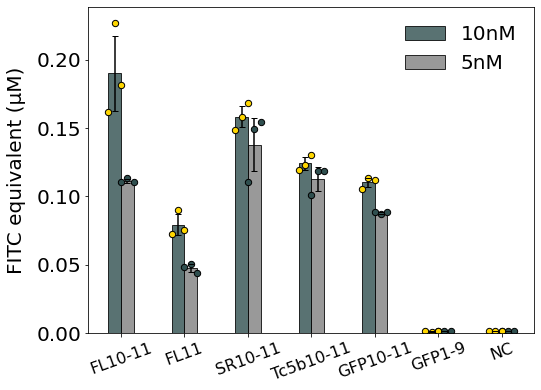

 Fig3C. Split-GFP reconstitution in extract doped with GFP1-9, and effect of linear DNA concentration on the measured fluorescence intensity, in comparison with full-lenght proteins


In [ ]:
#fig3C
#E.coli extract doped with GFP1-9

figname= 'Fig3C. Split-GFP reconstitution in extract doped with GFP1-9, and effect of linear DNA concentration on the measured fluorescence intensity, in comparison with full-lenght proteins'
A = df6.columns
L= A.to_list()
del L[0]
endpointfluo('Reorganised_data.xlsx', 'fig3C', 2, ['10nM', '5nM'], ['darkslategray'] , 20,
     ['FL10-11', 'FL11', 'SR10-11','Tc5b10-11', 'GFP10-11', 'GFP1-9', 'NC'], L)

print(f" {figname}")

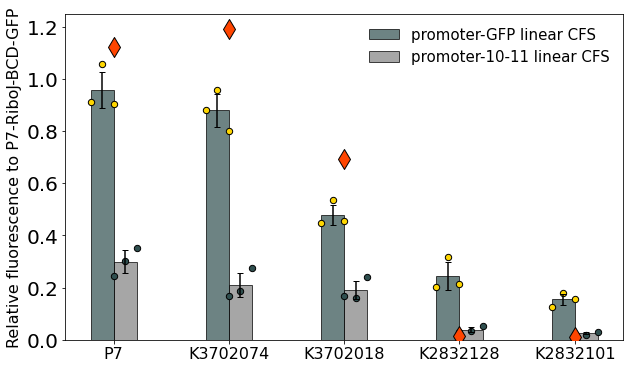

 Fig3D: Assessment of promoter activity using the GFP10-11 minireporter, sfGFP, and comparison with in vivo activity.


In [ ]:
#Fig3D
#Promoter comparison for TXTL prototyping
vivo = [1.121763953, 1.191110955, 0.6942768443, 0.01391324938, 0.009098642437] # cytometry data as Geometric mean intensity values for three rounds of acquisitions performed on different days.

figname= 'Fig3D: Assessment of promoter activity using the GFP10-11 minireporter, sfGFP, and comparison with in vivo activity.'

A = df7.columns
L= A.to_list()
del L[0]
endpointfluo('Reorganised_data.xlsx', 'Fig3D', 3, ['promoter-GFP linear CFS', 'promoter-10-11 linear CFS'], 'darkslategray', 0, ['P7','K3702074', 'K3702018', 'K2832128', 'K2832101'], L)


print(f" {figname}")

# Figure 4: Peptide production with T7-expression system - comparison fluorescence and standard purification


* linear DNAs were added at a 5nM final concentration.
* Fluorescence intensity values were measured at 8 hours from 3 replicates reactions in 10uL.
* The 3 replicates were pooled and histag purification followed by bradford assay were performed for peptide concentration
* Error bars: +/- SD for the fluorescence data.

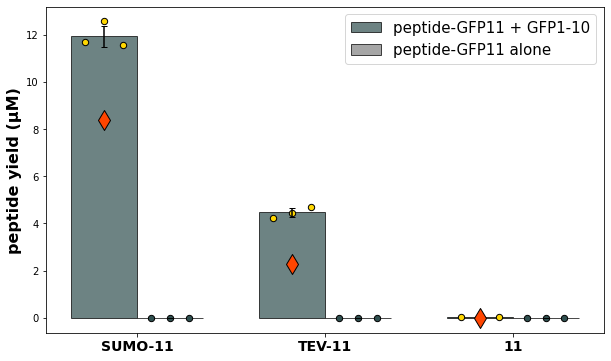

 Fig4B: application of split-GFP minireporter to the monitoring short peptides production in linear CFS.


In [ ]:
#fig 4. endpoint fluorescence tev sumo + histag purif
figname= 'Fig4B: application of split-GFP minireporter to the monitoring short peptides production in linear CFS.'
labels= ['SUMO-11', 'TEV-11', '11']

#data_plate_reader triplicates as single timepoints after 8h incubation in plate reader

SUMO=[26118, 28011, 25796]
SUMOonly=[485, 462, 476]
TEV=[9771, 10218, 10770]
TEVonly=[485, 448, 455]
GFP11=[558, 556, 522]
GFP11only=[463, 479, 475]
NC_CFSW=[312, 305, 316]

NC_mean = statistics.mean(NC_CFSW)


#data Bradford assay after Histag purification SUMO - TEV - GFP11 - NC
histag_val= [8.4, 2.3, 0, 0]

pr_data_1=[SUMO, TEV, GFP11] #peptide-GFP11 coexpressed with GFP1-10
pr_data_2 =[SUMOonly, TEVonly, GFP11only] #peptide-GFP11 expressed alone - negative controls

#pure GFP calibration plate reader equation is:  (X-140.54)/2194.95
for x in pr_data_1:
    x[0]= (x[0]-NC_mean-140.54)/2194.95
    x[1]= (x[1]-NC_mean-140.54)/2194.95
    x[2]= (x[2]-NC_mean-140.54)/2194.95

for x in pr_data_2:
    x[0]= (x[0]-NC_mean-140.54)/2194.95
    x[1]= (x[1]-NC_mean-140.54)/2194.95
    x[2]= (x[2]-NC_mean-140.54)/2194.95

#mean and std for Arb. Units plater reader
MEAN_1=[]
STD_1=[]
MEAN_2=[]
STD_2=[]

for x in pr_data_1:
    mean = statistics.mean(x)
    std = statistics.pstdev(x)
    MEAN_1+=[mean]
    STD_1+=[std]

for x in pr_data_2:
    mean = statistics.mean(x)
    std = statistics.pstdev(x)
    MEAN_2+=[mean]
    STD_2+=[std]

x = np.arange(len(labels))  #label locations
#print(x)
width = 0.35  #width of the bars

length = int(3)
X=[]
Y=[]
for i in range(length):
    X.append([i-0.1, i, i+0.1])
    Y.append(i)

Y= np.array(Y)
X = np.array(X)
PR_DATA_1= np.array(pr_data_1)
PR_DATA_2= np.array(pr_data_2)


fig, ax = plt.subplots(figsize=(10, 6))
for i in range(len(labels)):
    ax.scatter(X[i]+ width/2, PR_DATA_2[i], color='red', zorder=2, marker ="o", s=40, alpha =1, facecolors='darkslategray', edgecolors='0')
    ax.scatter(X[i]- width/2, PR_DATA_1[i], color='red', zorder=2, marker ="o", s=40, alpha =1, facecolors='gold', edgecolors='0')
    ax.scatter(x[i]-width/2, histag_val[i], color='red', zorder=3,  marker ="d", s=200, alpha =1, facecolors='orangered', edgecolors='0')


rects1 = ax.bar(x - width/2, MEAN_1, width, yerr = STD_1, label='peptide-GFP11 + GFP1-10', color= 'darkslategray', alpha=0.7, capsize = 3, edgecolor='0')
rects2 = ax.bar(x + width/2, MEAN_2, width, yerr= STD_2, label='peptide-GFP11 alone', color='gray', alpha=0.7, capsize = 3, edgecolor='0')


#Add features to the plots
color= sns.color_palette('colorblind')
ax.set_ylabel('peptide yield (µM)', fontsize=16, fontweight = 'bold')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontweight = 'bold')
plt.xticks(fontsize= 14, fontweight = 'bold', rotation = '0')
ax.legend(fontsize= 15)

#plt.savefig('Fig4B: Quantitative peptide synthesis', format='svg')

plt.show()
print(f" {figname}")

# Figure 5B: Functionality of minireporters based on split nanoluc in linear CFS


* linear DNAs were added at a 5nM final concentration.
* Luminescence Endpoint values were measured at 1 hour from 3 in triplicate in Cytation3 plate reader gain 150 at 37°C.
* Error bars: +/- SD for luminescence data.

the fold change is:  7632.589665653495


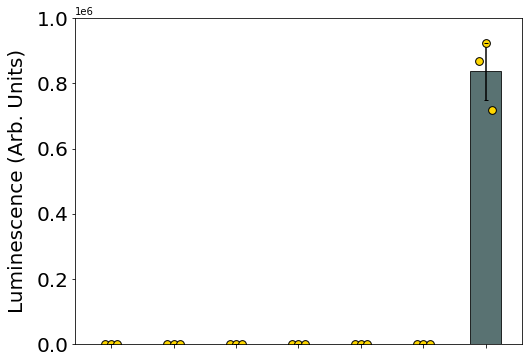

In [ ]:
#Fig5B
A=df8.columns
L=A.to_list()
labels=L
label2=['']*len(labels)
data = pd.read_excel('Reorganised_data.xlsx', 'Fig5B')
val=[]
for k in L:
    val+=[data[k].values.tolist()]

MEAN, STD =[], []
for x in range(len(val)):
    mean = statistics.mean(val[x])
    std = statistics.pstdev(val[x])
    MEAN+=[mean]
    STD+=[std]

Foldchange = MEAN[6]/MEAN[0]
print('the fold change is: ', Foldchange)

x = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars
length = len(L)
X=[]
for i in range(length):
    X.append([i-0.1, i, i+0.1])

X = np.array(X)
VAL = np.array(val)

fig, ax = plt.subplots(figsize=(8, 6))
rects2 = ax.bar(x, MEAN, width, yerr= STD, color='darkslategray', alpha=0.8, capsize = 2, edgecolor='0')

for i in range(len(labels)):
    ax.scatter(X[i], VAL[i], color='red', zorder=2, marker ="o", s=60, alpha =1, facecolors='gold', edgecolors='0')


#Add features to the plots
color= sns.color_palette('colorblind')
ax.set_ylabel('Luminescence (Arb. Units)', fontsize=20, fontweight = 'normal', labelpad=10)
ax.tick_params(axis='y', labelsize=20)
ax.set_ylim([0, 1000000])
ax.set_xticks(x)
ax.set_xticklabels(label2, fontweight = 'normal')
plt.xticks(fontsize= 16, fontweight = 'normal', rotation = 25)

#plt.savefig('Fig5B: Functionality of minireporters based on split nanoluc in linear CFS', format='svg')

plt.show()

# Figure S5: Increasing incubation time reduces luminescent signal


* linear DNAs were added at a 5nM final concentration.
* Luminescence Endpoint values were measured at 4 hours and 6 hours from 3 in triplicate in Cytation3 plate reader gain 150 at 37°C.
* Error bars: +/- SD for luminescence data.

the fold change is:  5950.4607843137255


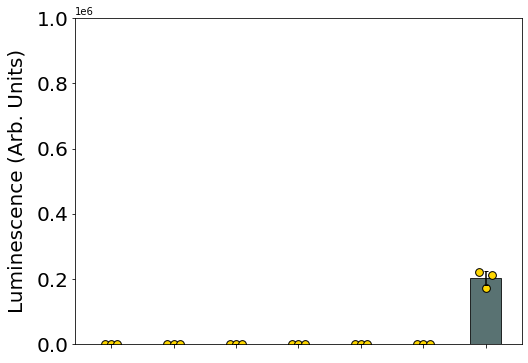

In [ ]:
#FigS5A
A=df9.columns
L=A.to_list()
labels=L
label2=['']*len(labels)
data = pd.read_excel('Reorganised_data.xlsx', 'FigS5A')
val=[]
for k in L:
    val+=[data[k].values.tolist()]

MEAN, STD =[], []
for x in range(len(val)):
    mean = statistics.mean(val[x])
    std = statistics.pstdev(val[x])
    MEAN+=[mean]
    STD+=[std]
Foldchange = MEAN[6]/MEAN[0]
print('the fold change is: ', Foldchange)

x = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars
length = len(L)
X=[]
for i in range(length):
    X.append([i-0.1, i, i+0.1])

X = np.array(X)
VAL = np.array(val)

fig, ax = plt.subplots(figsize=(8, 6))
rects2 = ax.bar(x, MEAN, width, yerr= STD, color='darkslategray', alpha=0.8, capsize = 2, edgecolor='0')

for i in range(len(labels)):
    ax.scatter(X[i], VAL[i], color='red', zorder=2, marker ="o", s=60, alpha =1, facecolors='gold', edgecolors='0')


#Add features to the plots
color= sns.color_palette('colorblind')
ax.set_ylabel('Luminescence (Arb. Units)', fontsize=20, fontweight = 'normal', labelpad=10)
ax.tick_params(axis='y', labelsize=20)
ax.set_ylim([0, 1000000])
ax.set_xticks(x)
ax.set_xticklabels(label2, fontweight = 'normal')
plt.xticks(fontsize= 16, fontweight = 'normal', rotation = 25)

#plt.savefig('Fig S5A: 4h incubation', format='svg')

plt.show()

the fold change is:  4938.894736842106


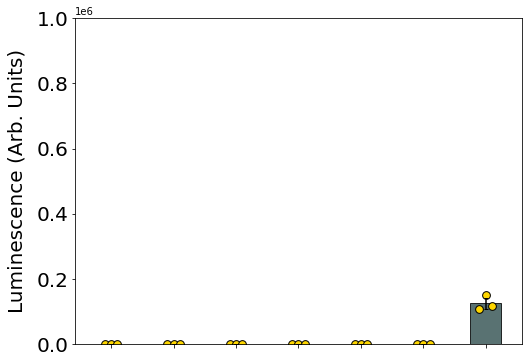

In [ ]:
#FigS5B
A=df10.columns
L=A.to_list()
labels=L
label2=['']*len(labels)
data = pd.read_excel('Reorganised_data.xlsx', 'FigS5B')
val=[]
for k in L:
    val+=[data[k].values.tolist()]

MEAN, STD =[], []
for x in range(len(val)):
    mean = statistics.mean(val[x])
    std = statistics.pstdev(val[x])
    MEAN+=[mean]
    STD+=[std]
Foldchange = MEAN[6]/MEAN[0]
print('the fold change is: ', Foldchange)

x = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars
length = len(L)
X=[]
for i in range(length):
    X.append([i-0.1, i, i+0.1])

X = np.array(X)
VAL = np.array(val)

fig, ax = plt.subplots(figsize=(8, 6))
rects2 = ax.bar(x, MEAN, width, yerr= STD, color='darkslategray', alpha=0.8, capsize = 2, edgecolor='0')

for i in range(len(labels)):
    ax.scatter(X[i], VAL[i], color='red', zorder=2, marker ="o", s=60, alpha =1, facecolors='gold', edgecolors='0')


#Add features to the plots
color= sns.color_palette('colorblind')
ax.set_ylabel('Luminescence (Arb. Units)', fontsize=20, fontweight = 'normal', labelpad=10)
ax.tick_params(axis='y', labelsize=20)
ax.set_ylim([0, 1000000])
ax.set_xticks(x)
ax.set_xticklabels(label2, fontweight = 'normal')
plt.xticks(fontsize= 16, fontweight = 'normal', rotation = 25)

#plt.savefig('Fig S5B: 6h incubation', format='svg')

plt.show()